In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

from csr2d.core import psi_s, psi_x, psi_x_where_x_equals_zero, kappa, alpha, alpha_exact
import csr2d.core
import csr2d.core2
import csr2d.core_mpmath as core_mpmath

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.interpolate import RectBivariateSpline, RegularGridInterpolator, interpn, interp2d

import scipy.constants
mec2 = scipy.constants.value('electron mass energy equivalent in MeV')*1e6
c_light = scipy.constants.c
e_charge = scipy.constants.e
r_e = scipy.constants.value('classical electron radius')

from scipy.interpolate import RectBivariateSpline

# Physical parameters

In [4]:
#sigma_z = 40e-6
#sigma_x = 134e-6 
#rho = 1538.
#gamma = 58708.

sigma_z = 10e-6
sigma_x = 10e-6 
rho = 1.
gamma = 500.


beta = np.sqrt(1 - 1 / gamma ** 2)
beta2 = 1-1/gamma**2


gamma = 500.
beta = np.sqrt(1 - 1 / gamma ** 2)

In [5]:
xmax = 1/gamma**2
xmin = -xmax
xptp = xmax-xmin

zmax = 1/gamma**2
zmin = -zmax
zptp = zmax-zmin

fac = 4
nx = 32*fac
nz = 64*fac

dx = xptp/(nx-1)
dz = zptp/(nz-1)

xvec = np.linspace(xmin, xmax, nx)
zvec = np.linspace(zmin, zmax, nz)

X, Z = np.meshgrid( xvec, zvec, indexing='ij')

xmax, zmax

(4e-06, 4e-06)

# alpha

Test with alpha from core, old core2, and numba core2

In [6]:
%%time
A1 = csr2d.core.alpha(Z, X, beta)
A1.max()

CPU times: user 16.1 ms, sys: 2.08 ms, total: 18.2 ms
Wall time: 17.5 ms


0.02884449083359187

In [7]:
%%time
A2 = csr2d.core2.old_alpha(Z, X, beta2)
A2.max()

CPU times: user 7.12 ms, sys: 779 µs, total: 7.9 ms
Wall time: 7.07 ms


0.028844490833591873

In [8]:
%%time
A3 = csr2d.core2.alpha(Z, X, beta2)
A3.max()

CPU times: user 2.36 ms, sys: 612 µs, total: 2.97 ms
Wall time: 2.45 ms


0.02884449083359481

In [9]:
err2 = np.abs((A2-A1)/A1)
err2.max()

4.207298800923348e-08

In [10]:
err3 = np.abs((A2-A1)/A1)
err3.max()

4.207298800923348e-08

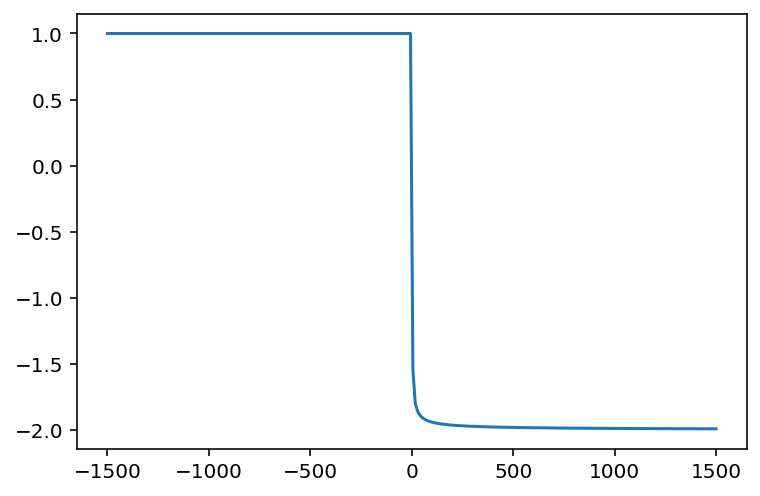

In [11]:
plt.plot(zvec*(3*gamma**3), psi_x_where_x_equals_zero(zvec, 1e-13, beta))

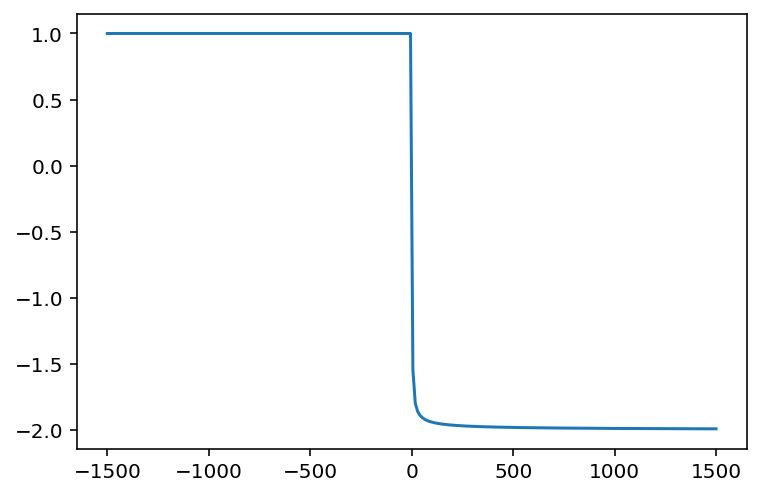

In [12]:
plt.plot(zvec*(3*gamma**3), psi_x(zvec, 1e-13, beta))

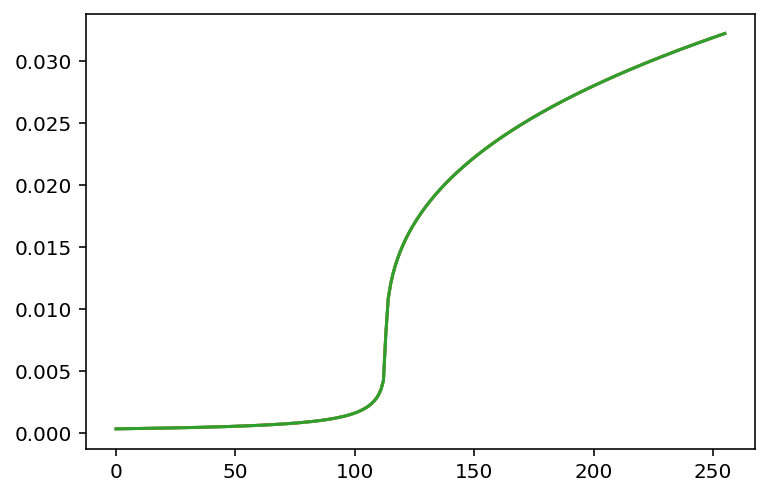

In [13]:
plt.plot(alpha(zvec, 1e-4, beta))
plt.plot(alpha_exact(zvec, 1e-4, beta))
plt.plot([core_mpmath.alpha(z, 1e-4, beta) for z in zvec])

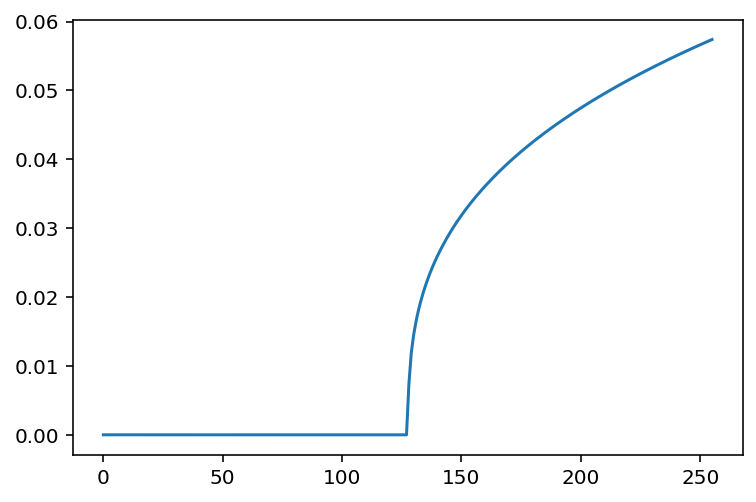

In [14]:
plt.plot(kappa(zvec, 0, beta))

# psi_s

In [15]:
%%time
# Original
R1 = csr2d.core.psi_s(Z, X, beta)

CPU times: user 55.7 ms, sys: 2.45 ms, total: 58.2 ms
Wall time: 57.4 ms


In [16]:
%%time
# old
R2 = csr2d.core2.old_psi_s(Z, X, beta)

CPU times: user 9.06 ms, sys: 944 µs, total: 10 ms
Wall time: 9.03 ms


In [17]:
%%time
# Numba
R3 = csr2d.core2.psi_s(Z, X, beta)

CPU times: user 10.3 ms, sys: 1.23 ms, total: 11.5 ms
Wall time: 1.86 ms


In [18]:
err2 = np.abs((R2-R1)/R1)
err2.max()

5.5077040564931164e-11

In [19]:
err3 = np.abs((R3-R1)/R1)
err3.max()

5.5077040564931164e-11

# psi_x

In [20]:
%%time
# Original
R1 = csr2d.core.psi_x(Z, X, beta)

CPU times: user 313 ms, sys: 10.7 ms, total: 324 ms
Wall time: 53.6 ms


In [21]:
%%time
# Old core2
R2 = csr2d.core2.old_psi_x(Z, X, beta)

CPU times: user 19.7 ms, sys: 1.26 ms, total: 21 ms
Wall time: 20.3 ms


In [22]:
%%time
# Numba
R3 = csr2d.core2.psi_x(Z, X, beta)

CPU times: user 13.6 ms, sys: 882 µs, total: 14.5 ms
Wall time: 13.7 ms


In [23]:
%%time
# Numba protecting about x=0
R4 = csr2d.core2.psi_x0(Z, X, beta, dx)

CPU times: user 22.2 ms, sys: 1.55 ms, total: 23.8 ms
Wall time: 3.73 ms


In [24]:
err2 = np.abs((R2-R1)/R1)
err2.max()

1.344407951849536e-09

In [25]:
err3 = np.abs((R3-R1)/R1)
err3.max()

3.6420118965787055e-07

In [26]:
err4 = np.abs((R4-R1)/R1)
err4.max()

3.6420118965787055e-07

In [27]:
#gamma = 1000
#beta = np.sqrt(1-1/gamma**2)
#
#xmax = 0.01/ gamma**2
#xlist = np.linspace(-xmax, xmax, 10)
#dx = np.mean(np.diff(xlist))
#zmax = 100/ gamma**3
#zlist = np.linspace(-zmax, zmax, 10)
#for z in zlist:
#    plt.plot(xlist* gamma**2, csr2d.core2.psi_x(z, xlist, beta))

# Green function 

In [28]:
from csr2d.core2 import psi_x, psi_x0, old_psi_x, psi_sx,  psi_s

In [29]:
def green_meshes(nz, nx, dz, dx, rho=None, beta=None):
    """
    Computes Green funcion meshes for psi_s and psi_x simultaneously.
    These meshes are in real space (not scaled space).
    
    Parameters
    ----------
    nz, nx : int
        Size of the density mesh in z and x

    dz, dx : float
        Grid spacing of the density mesh in z and x [m]
        
    rho : float
        bending radius (must be positve)
        
    beta : float
        relativistic beta
    
    Returns:
    tuple of:
        psi_s_grid : np.array
            Double-sized array for the psi_s Green function
        
        psi_x_grid : 
            Double-sized array for the psi_x Green function
        
        zvec2 : array-like
            Coordinate vector in z (real space) [m]

        xvec2 : array-like
            Coordinate vector in x (real space) [m]
    
    """
    
    # Change to internal coordinates
    dx = dx/rho
    dz = dz/(2*rho)
    
    # Double-sized array for convolution with the density
    zvec2 = np.arange(-nz+1,nz+1,1)*dz # center = 0 is at [nz-1]
    xvec2 = np.arange(-nx+1,nx+1,1)*dx # center = 0 is at [nx-1]
    
    # Corrections to avoid the singularity at x=0
    # This will calculate just off axis. Note that we don't need the last item, 
    # because the density mesh does not span that far
    #xvec2[nx-1] = -dx/2
    #xvec2[-1] = dx/2 
    
    zm2, xm2 = np.meshgrid(zvec2, xvec2, indexing="ij")
    
    # Evaluate
    #psi_s_grid, psi_x_grid = psi_sx(zm2, xm2, beta)
    psi_s_grid = psi_s(zm2, xm2, beta) # Numba routines!
    #psi_x_grid = old_psi_x(zm2, xm2, beta) 
    psi_x_grid = psi_x0(zm2, xm2, beta, dx) # Will average around 0
    
    # Average out the values around x=0
    #psi_s_grid[:,nx-1] = (psi_s_grid[:,nx-1] + psi_s_grid[:,-1])/2
    #psi_x_grid[:,nx-1] = (psi_x_grid[:,nx-1] + psi_x_grid[:,-1])/2    
    
    # Remake this 
    #xvec2 = np.arange(-nx+1,nx+1,1)*dx*rho
    
    return psi_s_grid, psi_x_grid, zvec2*2*rho, xvec2

NZ = 512
NX = 256

Gs, Gx, zvec2, xvec2 = green_meshes(NZ, NX, 4/gamma**2/NZ/1000 , 4/gamma**2/NX , rho=1, beta=beta)

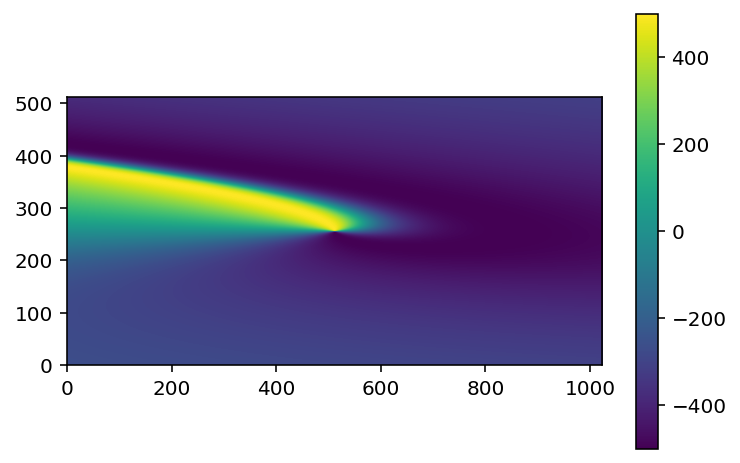

In [30]:
plt.imshow(Gs.T, origin='lower')
plt.colorbar()

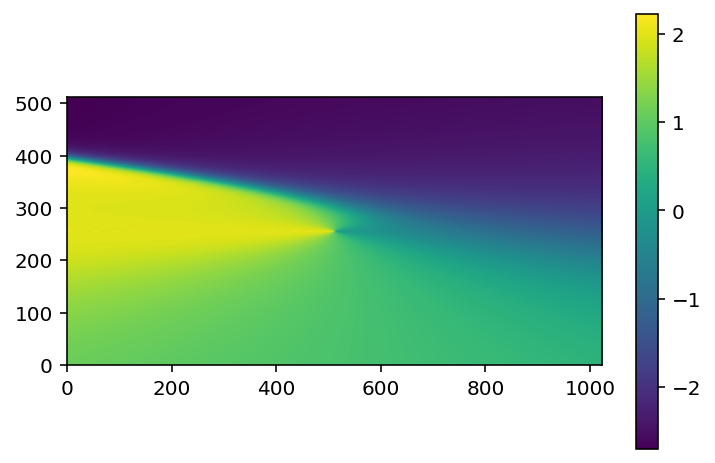

In [31]:
plt.imshow(Gx.T, origin='lower')
plt.colorbar()

Text(0.5, 1.0, '$\\psi_s$')

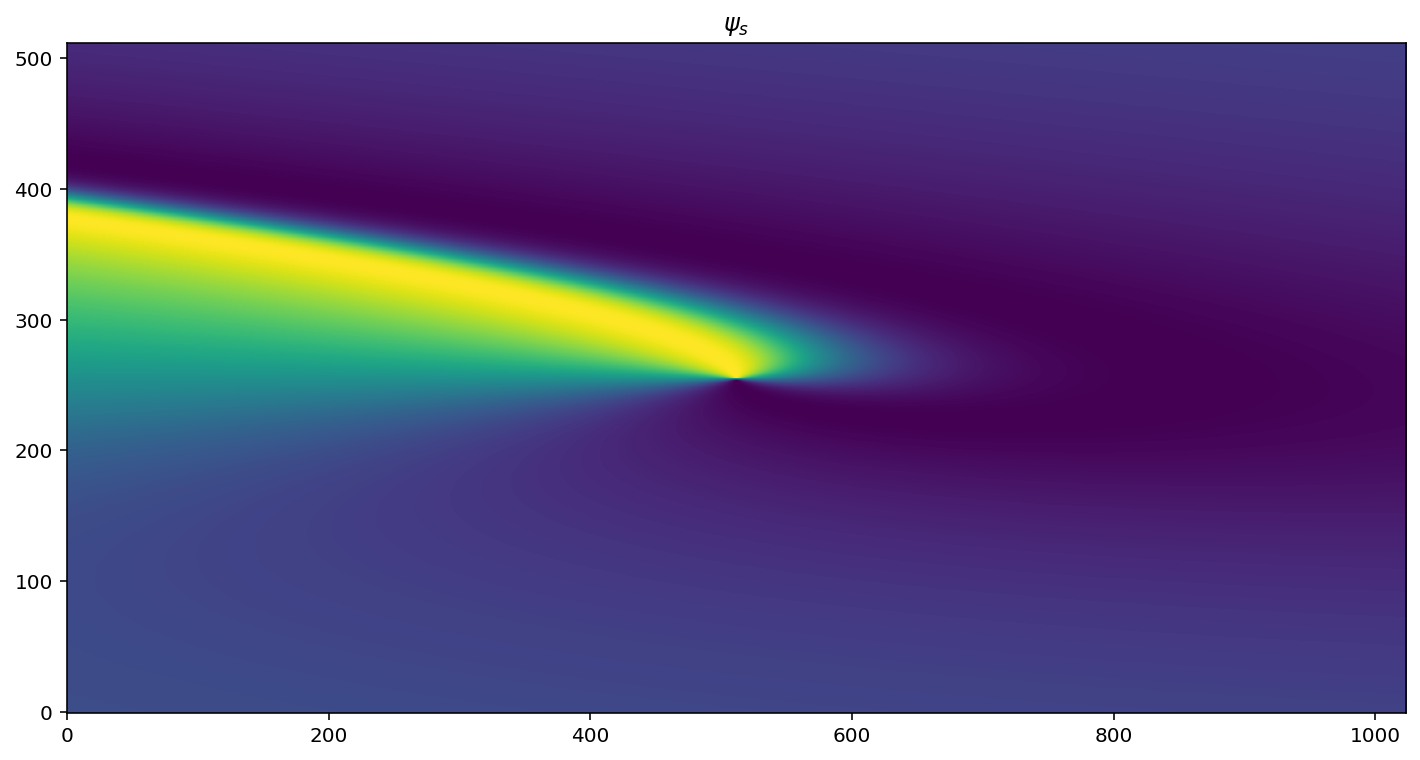

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(Gs.T, origin='lower')
ax.set_title(r'$\psi_s$')

Text(0.5, 1.0, '$\\psi_x$')

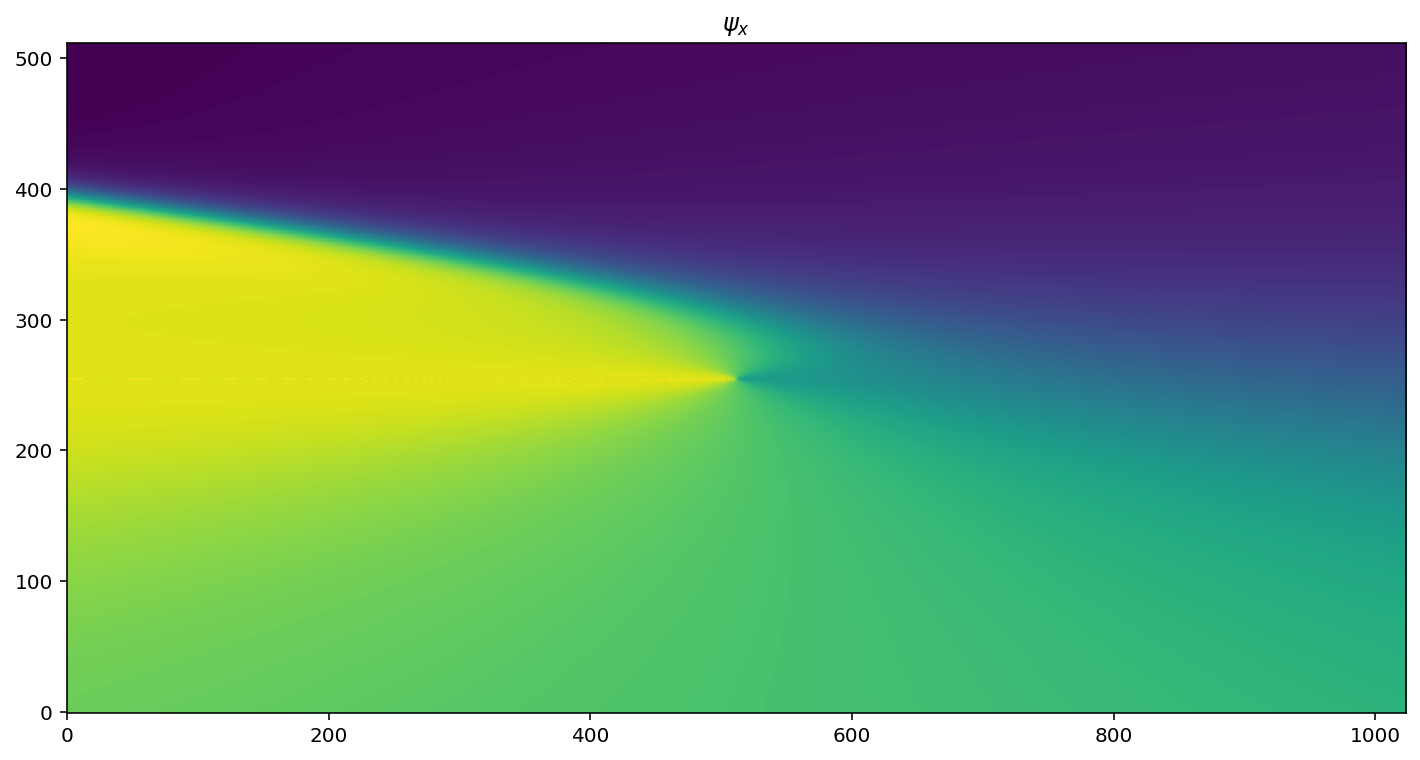

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(Gx.T, origin='lower')
ax.set_title(r'$\psi_x$')